In [ ]:
% Q'Qc = Q'v

function coeff = least_square(vector, basis)
    Q = basis;
    v = vector;
    coeff = (Q'*Q)\(Q'*v);
end

format rat;

In [2]:
% Approximation of arbitrary vector in a subspace

format short;
vector = [1 ; 1 ; 1 ; 1 ; 1];
basis = [[-1 ; 2 ; -1 ; 4 ; 5] [3 ; 1 ; 2 ; 2 ; -3]];
approx = basis*least_square(vector, basis)







approx =

   0.5834
   0.7793
   0.3054
   1.5586
   0.4192










coeff =

          *
          1
          *
       -1/6






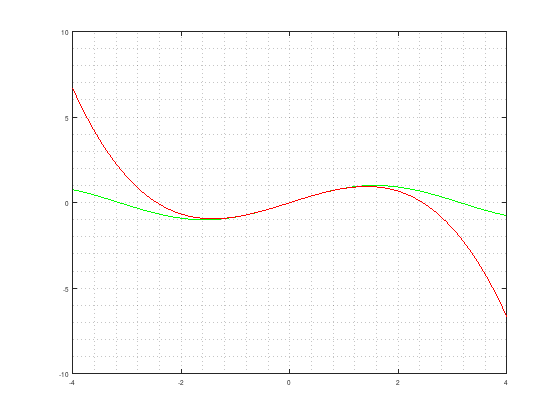

In [12]:
% Taylor Series of sin(x)

format rat;
x = linspace(-0.01, 0.01, 100)';
vector = @(x) sin(x);
basis = @(x) [x.^0 x.^1 x.^2 x.^3];
coeff = least_square(vector(x), basis(x))

t = linspace(-4, 4, 100)';
plot(t, vector(t), "g", t, basis(t)*coeff, "r"), grid minor;

In [13]:
% Taylor Series of exp(ix) vs cos(x) + isin(x)

format rat;
x = linspace(-0.01, 0.01, 100)';
vector = @(x) exp(i*x);
basis = @(x) [x.^0 x.^1 x.^2 x.^3];
coeff_exp = least_square(vector(x), basis(x))

vector = @(x) cos(x) + i*sin(x);
basis = @(x) [x.^0 x.^1 x.^2 x.^3];
coeff_trig = least_square(vector(x), basis(x))








coeff_exp =

          1 -         *i
          * +         1i
       -1/2 +         *i
          * -       1/6i





coeff_trig =

          1 -         *i
          * +         1i
       -1/2 +         *i
          * -       1/6i



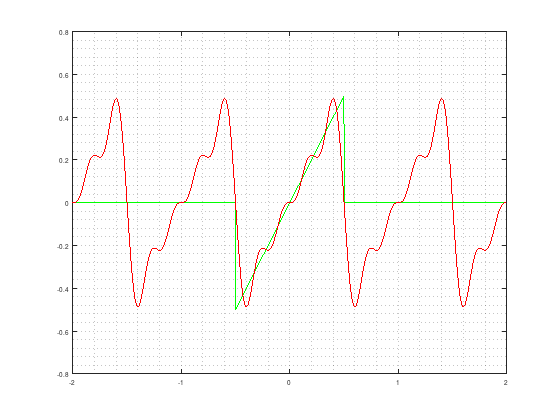

In [6]:
% Fourier series of saw-tooth

format short;
function vect = vector(x, T)
    vect = zeros(size(x));
    for i = 1:length(x)
        if (x(i) >= -T/2 && x(i) <= T/2)
            vect(i) = x(i);
        else
            vect(i) = 0;
        end
    end
end

function val = basis(x, n, T)
    val = [];
    for k = 1:n
        val = [val sin(k*2*pi/T .* x) cos(k*2*pi/T .* x)];
    end
end

T = 1;
x = linspace(-T/2, T/2, 1000)';
n = 4;
coeff = least_square(vector(x, T), basis(x, n, T));

t = linspace(-2*T, 2*T, 1000)';
plot(t, vector(t, T), "g", t, basis(t, n, T)*coeff, "r"), grid minor;

















    least_square at line 4 column 11





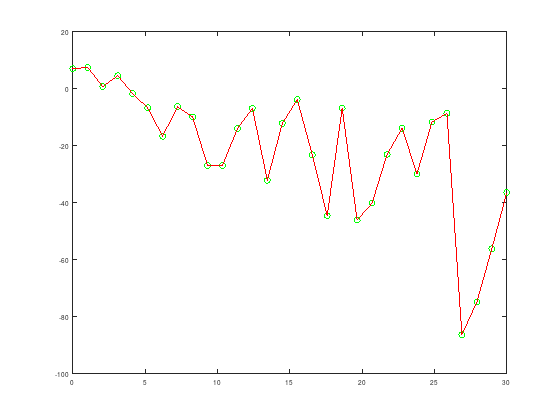

In [16]:
% Discrete fourier transform

function val = basis(x, N)
    val = [];
    for k = 1:N
        val = [val sin(k*2*pi/N .* x)];
    end
    for k = 1:N
        val = [val cos(k*2*pi/N .* x)];
    end
end

N = 30;
x = linspace(0, N, N)';
y = -2.*x + 7 + x.*randn(size(x));
coeff = least_square(y, basis(x, N));

plot(x, y, "go", x, basis(x, N)*coeff, "r");


















    least_square at line 4 column 11





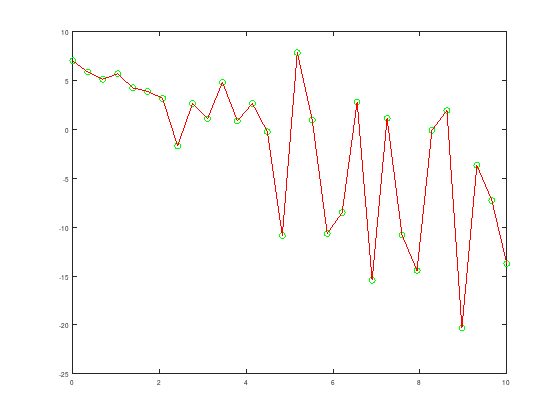

In [88]:
% Discrete fourier transform

function val = basis(x, N, T)
    val = [];
    for k = 1:N
        %val = [val exp(i*k*2*pi/T .* x)];
        val = [val sin(k*2*pi/T .* x) cos(k*2*pi/T .*x)];
    end
end

format short;
T = 10;
N = 30;
x = linspace(0, T, N)';
y = -2.*x + 7 + x.*randn(size(x));
basis = basis(x, N, T);
coeff = least_square(y, basis);

plot(x, y, "go", x, basis*coeff, "r");